In [1]:
%matplotlib inline
from IPython.core.display import HTML

import numpy as np;
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D
import random;

$$\LaTeX \text{ macros here }
\newcommand{\X}{\mathcal{X}}
\newcommand{\L}{\mathcal{L}}
$$

# Miscellaneous Notes
- The bound on the log-likelihood is sometimes called the ELBO (Evidence Lower Bound)

# Introduction

In statistics and machine learning, **Expectation-Maximization (EM)** is an iterative framework that enables Maximum Likelihood or Maximum a Posteriori parameter estimates in the presence of latent variables.  

There are a variety of popular theoretical and application-oriented descriptions of Expectation-Maximization out there, among them a handful of commonly-cited papers and even a few inspired blog posts that raise interesting questions, but as far as I know no one resource covers all the bases in a manner satisfactory for self-study.  The intuitive toy examples I started with quickly shied away from the theory I needed, so I found myself toiling through technical reports dense with justification yet lacking useful examples.  Unfortunately, differences in notation and terminology made it hard for me to connect the dots.

Hopefully my time spent sifting through all the different notation and terminology will save other beginners out there a few days' headache!

# Theory

**Definition**:  A function $f:I\mapsto\mathbb{R}$ is **convex** on the interval $I=[a,b]$ if $\forall x_1,x_2\in I, \lambda\in[0,1]$,

$$f(\lambda x_1 + (1-\lambda) x_2) \leq \lambda f(x_1) + (1-\lambda) f(x_2)$$

That is, the graph of $f$ on any interval $I$ is *below* the line drawn between the function evaluated at the endpoints.

Interestingly, this property of convex functions can be generalized to $n$ points.

**Theorem (Jensen's Inequality):** Let $f$ be a convex function defined on the interval $i$.  If $x_1,x_2,\dots,x_n\in I$ and $\lambda_1,\lambda_2,\dots,\lambda_n\in[0,1]$ with $\sum_{k=1}^n \lambda_k=1$, then

$$f \left( \sum_{k=1}^n \lambda_k x_k \right) \leq \sum_{k=1}^n \lambda_k f(x_k)$$

# Motivating Example:  Coin Flips

**Coin Flip Example**
- Two coins with bias $\theta_A$, $\theta_B$.  
- For $i=\{1\dots N\}$:
  - Pick a coin $Z_i$ at random.
  - Flip $M$ times, assigning the resulting flips to $X_i$.

**Maximum Likelihood Estimate of $\theta$ **
- With complete information, estimating $\theta$ is easy.
- For the trials generated by each coin, simply compute the ratios of heads to tails

**Classification Maximization**
- What if the $Z$ are hidden?
- Start with an initial estimate of the parameters $\theta_0$
- Repeat until convergence:
  - Compute $P(z|\mathcal{X},\theta)$ for each possible assignment $z \in Z$.
  - The assignment $z^* = \arg \max_{z\in Z} P(z,\mathcal{X},\theta)$ is the most probable value of the hidden variable, given our data and assuming that the current estimate of parameters is correct.
  - Now, we can maximize estimate of the complete-data likelihood $P(\mathcal{X},z^*|\theta)$ using ML parameter estimation, as in the complete-data case above.
- This works well if the observed trials are clearly distinct, but in general we want to use all of the information we have, especially if no one assignment looks overly promising

**Expectation Maximization**
- So, rather than choosing a single assingment, let's average the likelihood of the data under all possible assignments, weighting each likelihood by the probability $P(z|\mathcal{X},\theta)$.
- So instead, we maximize the following w.r.t. $\theta$:

$$\sum_{z\in Z} P(z|\mathcal{X},\theta) \ln P(\mathcal{X},z|\theta) 
= E_{P(Z|\mathcal{X},\theta)}\left[ \ln P(\mathcal{X},z|\theta) \right]$$

This is the expected log-likelihood of the data, under the estimate of parameters $\theta$.

# Maximum Likelihood

Recall that the aim of parameter estimation is to pick the parameter set $\theta$ that best explain a set of observations $\mathcal{X}$ of variables $X$.  In **Maximium Likelihood** estimation, we seek to choose parameters $\theta_{ML}^*$ such that the data $\mathcal{X}$ is most likely to occur under our probability model.  Appropriately, we maximize the likelihood function $ L(\theta|\mathcal{X})=P(\mathcal{X}|\theta) $ with respect to the parameters $\theta$.

$$
\theta_{ML}^* = \arg \max_{\theta} L(\theta|\mathcal{X}) 
= \arg \max_{\theta} P(\mathcal{X}|\theta)
= \arg \max_{\theta} \log P(\mathcal{X}|\theta)
$$



# Maximum Likelihood with Latent Variables

Suppose that under our model, the data $ \mathcal{X} $ is influenced by latent variables $ Z $ that we do not observe.  Now, finding the maximum likelihood estimate involves introducing the hidden variables via a sum  over all possible assignments to $Z$:

$\newcommand{\THETA}{\theta_n}$
$$\begin{align}
\log L(\theta|\mathcal{X}) 
&= \log P(\X|\theta) \\
&= \log \sum_{z\in Z} P(\X,z|\theta) \\
&= \log \sum_{z\in Z} P(z|\X,\THETA) 
    \frac{P(\X,z|\theta)}{P(z|\X,\THETA)} \\
&\geq \sum_{z\in Z} P(z|\X,\THETA) \log 
    \frac{P(\X,z|\theta)}{P(z|\X,\THETA)} \\
&= E_{P(Z|\X,\THETA)}\left[ \log 
    \frac{P(\X,z|\theta)}{P(z|\X,\THETA)} \right]
\end{align}$$

# Approaches

Before presenting Expectation-Maximization in my preferred way, I feel the need to discuss common alternative derivations of the algorithm and their shortcomings.  Among the most cited tutorials are those by **[Borman 2004]**, **[Dellaert 2002]**, and **[Neal & Hinton 1999]**.  I have normalized the notation (translation key provided!) for easy comparison. 

- **Random Variables** will be written with uppercase roman fonts, i.e.
  - Data $X$ to be observed *later*
  - Hidden Variables $Z$
  - Parameters $\Theta$
- **Observations** or possible **values** of random variables will be written with lowercase roman fonts, i.e.
  - One possible setting $z$ of the hidden variables $Z$.
- **Collections of Observations** will be written with calligraphic uppercase symbols:
  - Observations $\X=(x_1,x_2,\dots,x_n)$ of the random variable $X$.

## "EM: A Short Tutorial" [Borman 2004]

## "The EM Algorithm" [Dellaert 2002]

Mazimize posterior probability of parameters $\theta$ given data $X$ in presence of hidden variables $Z$.  From the definition of conditional probability, this is equivalent to maximizing the joint probability of the data and parameters.

$$\theta^* = \arg\max_{\theta} P(\theta|X) = \arg\max_{\theta} \ln P(\theta|X) = \arg\max_{\theta} \ln\frac{P(X,\theta)}{P(X)}$$

Next, we express the joint probability as a sum over hidden variables, and introduce an approximating distribution $q(z)$ over the hidden variables intended to help bound the joint distribution.

$$\begin{align}
\ln P(X,\theta) 
&= \ln\sum_{z\in Z} P(X,z,\theta) \\
&= \ln\sum_{z\in Z} q(z) \frac{P(X,z,\theta)}{q(z)}
\end{align}$$

By applying Jensen's Inequality to the natural logarithm, which is concave, we can introduce a lower bound $B(\theta; \theta^t)$ on the joint log-probability:

$$\ln\sum_{z\in Z} q(z) \frac{P(X,z,\theta)}{q(z)}
\geq \sum_{z\in Z} q(z) \ln \frac{P(X,z,\theta)}{q(z)} 
\equiv B(\theta;\theta^t)$$

The question now is which approximating distribution $q(z)$ to use?  Intuitively, 

## "A View of the EM Algorithm..." [Neal & Hinton 1999]

The authors present a "view of the EM algorithm in which it is seen as maximizing a joint function of the parameters and of the distribution over the unobserved variables," in order to justify and compare common variations of the algorithm.

They first present EM in the following form:

- **E-Step**: Compute $q_{t+1}(z) = P(z|\X,\theta_t)$.
- **M-Step**: Set $\theta_{t+1}
    = \arg\max_{\theta} E_{q_{t+1}}\!\left[ \ln P(\X,Z|\theta) \right]$

then restate it in terms of an unnamed quantity $F(q,\theta)$, defined as:

$$F(q,\theta)
= E_q\left[\ln P(Z,\X|\theta) \right] + H(q)
= -D_{KL}(q \,||\, P(Z|\X,\theta)) + \ln P(\X|\theta)$$

The algorithm then begins to clearly resemble simple coordinate ascent:

- **E-Step**: Set $q_{t+1} = \arg\max_q F(q,\theta_t)$.
- **M-Step**: Set $\theta_{t+1} = \arg\max_{\theta} F(q_{t+1},\theta)$

The remainder of the paper is spent showing that these two forms of the algorithm are equivalent and developing variants that improve performance in some way.

# Classification Maximization

# Expectation Maximization Derivation

# Coin Toss Example

### Setup

Suppose we have two coins with bias $\theta_A$ and $\theta_B$, respectively.  We observe $N$ trials.  Each trial consists of choosing a random coin and flipping it $M$ times.  The simulation results in data as follows:

In [120]:
def coinflip(bias):
    return "H" if random.random() < bias else "T";
def generateData(N,M):
    # Random bias for each coin
    biasA = random.betavariate(2,1);
    biasB = random.betavariate(1,2);
    print("Generating data with biasA=%0.2f, biasB=%0.2f" % (biasA,biasB));
    # Generate rolls
    rolls = [];
    for i in range(N):
        roll = "";
        for j in range(M):
            bias = biasA if random.random() > 0.5 else biasB;
            roll += coinflip(bias);
        rolls.append(roll);
    return rolls;

In [121]:
def likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H");
    flips = len(roll);
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads);

def marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = [];
    for roll in rolls:
        h = roll.count("H");
        t = roll.count("T");
        likelihoodA = likelihood(roll, biasA);
        likelihoodB = likelihood(roll, biasB);
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)));
    return sum(trials);

In [122]:
# Data from Paper
rolls = [ "HTTTHHTHTH", 
          "HHHHTHHHHH", 
          "HTHHHHHTHH", 
          "HTHTTTHHTT", 
          "THHHTHHHTH" ];
# Random Data
#rolls = generateData(10,50);

# Count Trials, Flips
N = len(rolls);
M = len(rolls[0]);

# Print Data
for roll in rolls:
    print("%s (%d heads, %d tails)" % (roll,roll.count("H"),roll.count("T")));

HTTTHHTHTH (5 heads, 5 tails)
HHHHTHHHHH (9 heads, 1 tails)
HTHHHHHTHH (8 heads, 2 tails)
HTHTTTHHTT (4 heads, 6 tails)
THHHTHHHTH (7 heads, 3 tails)


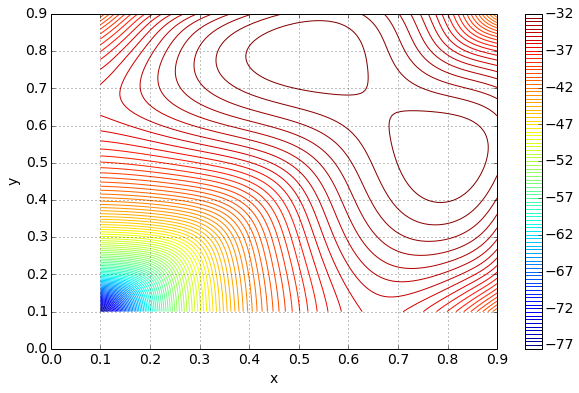

In [123]:
xvals = np.linspace(0.1,0.9,100);
yvals = np.linspace(0.1,0.9,100);
X,Y = np.meshgrid(xvals, yvals);
Z = [];
for i,r in enumerate(X):
    z = []
    for j,c in enumerate(r):
        z.append(marginal_likelihood(rolls,c,Y[i][j]));
    Z.append(z);
    
axes = getAxes();
#axes.contour([0.8,0.8],[0.45,0.45],[-80,marginal_likelihood(rolls,.8,0.45)+40],c="r");

C = axes.contour(X,Y,Z,100);
cbar = plt.colorbar(C);

### Classification Maximization

In [141]:
# Initial Guess
theta_A = 0.6;
theta_B = 0.5;

# Iterate
for c in range(20):
    print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B));
    # Assign a coin to each trial
    coin_assignments = [];
    heads_A, total_A = 0,0;
    heads_B, total_B = 0,0;
    for trial in rolls:
        likelihood_A = likelihood(trial,theta_A);
        likelihood_B = likelihood(trial,theta_B);
        if likelihood_A > likelihood_B:
            heads_A += trial.count("H");
            total_A += len(trial);
        else:
            heads_B += trial.count("H");
            total_B += len(trial);
    # Recompute Thetas
    theta_A = heads_A / total_A;
    theta_B = heads_B / total_B;

#0:	0.60 0.50
#1:	0.80 0.45
#2:	0.80 0.45
#3:	0.80 0.45
#4:	0.80 0.45
#5:	0.80 0.45
#6:	0.80 0.45
#7:	0.80 0.45
#8:	0.80 0.45
#9:	0.80 0.45
#10:	0.80 0.45
#11:	0.80 0.45
#12:	0.80 0.45
#13:	0.80 0.45
#14:	0.80 0.45
#15:	0.80 0.45
#16:	0.80 0.45
#17:	0.80 0.45
#18:	0.80 0.45
#19:	0.80 0.45


### Expectation Maximization

In [140]:
# Initial Guess
theta_A = 0.6;
theta_B = 0.5;

# Iterate
for c in range(20):
    print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B));
    # Assign a coin to each trial
    coin_assignments = [];
    heads_A, tails_A = 0,0;
    heads_B, tails_B = 0,0;
    for trial in rolls:
        likelihood_A = likelihood(trial,theta_A);
        likelihood_B = likelihood(trial,theta_B);
        p_A = likelihood_A / (likelihood_A + likelihood_B);
        p_B = likelihood_B / (likelihood_A + likelihood_B);
        heads_A += p_A * trial.count("H");
        tails_A += p_A * trial.count("T");
        heads_B += p_B * trial.count("H");
        tails_B += p_B * trial.count("T");
    # Recompute Thetas
    theta_A = heads_A / (heads_A + tails_A);
    theta_B = heads_B / (heads_B + tails_B);

#0:	0.60 0.50
#1:	0.71 0.58
#2:	0.75 0.57
#3:	0.77 0.55
#4:	0.78 0.53
#5:	0.79 0.53
#6:	0.79 0.52
#7:	0.80 0.52
#8:	0.80 0.52
#9:	0.80 0.52
#10:	0.80 0.52
#11:	0.80 0.52
#12:	0.80 0.52
#13:	0.80 0.52
#14:	0.80 0.52
#15:	0.80 0.52
#16:	0.80 0.52
#17:	0.80 0.52
#18:	0.80 0.52
#19:	0.80 0.52


# References

**[1]** 